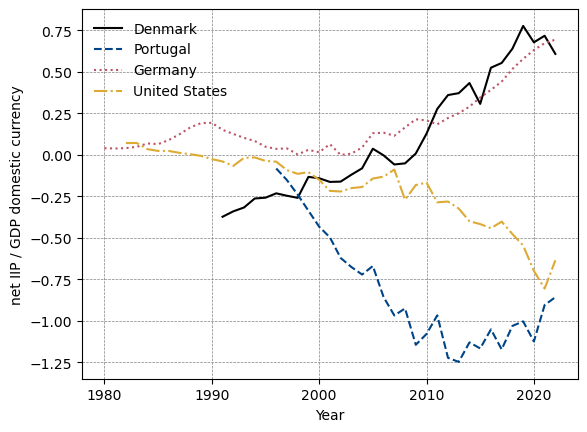

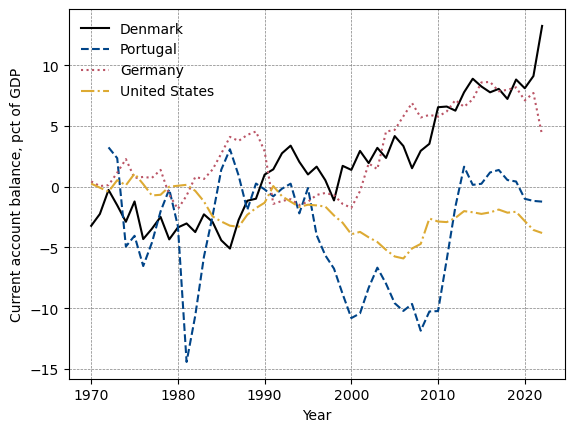

In [1]:
## Plotting interesting graphs relating to open economy macroeconomics
import pandas as pd
import matplotlib.pyplot as plt
import eurostat

## External wealth of nations database: https://www.brookings.edu/articles/the-decline-in-global-cross-border-holdings-in-2022/
## Import the dataset
data = pd.read_excel('EWN-dataset-12.18.23.xlsx', sheet_name='Dataset')

CB =  ['#000000','#004488','#BB5566','#DDAA33', 'purple']
LS = ['solid', 'dashed', ':', '-.']

## Net foreign asset position
countryset = ['Denmark','Portugal','Germany','United States']

def plotfig(data,countryset, variable,size):

    for i in range(size):
        c = countryset[i]
        plotdata = data.loc[data['Country'] == c]
        plt.plot(plotdata['Year'], plotdata[variable], color=CB[i], linestyle = LS[i], label = c)
    plt.legend(frameon = False)
    plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
    plt.ylabel(variable)
    plt.xlabel('Year')
    
plotfig(data, countryset, 'net IIP / GDP domestic currency',4)
plt.savefig('nfa.pdf')
plt.show()

## Current account balance as percent of GDP 
data['Current account balance, pct of GDP'] = data['Current account balance']/data['GDP (US$)']*100
plotfig(data, countryset, 'Current account balance, pct of GDP',4)
plt.savefig('ca.pdf')
plt.show()



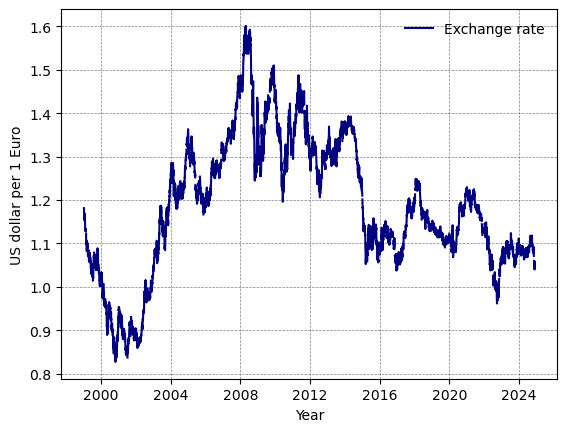

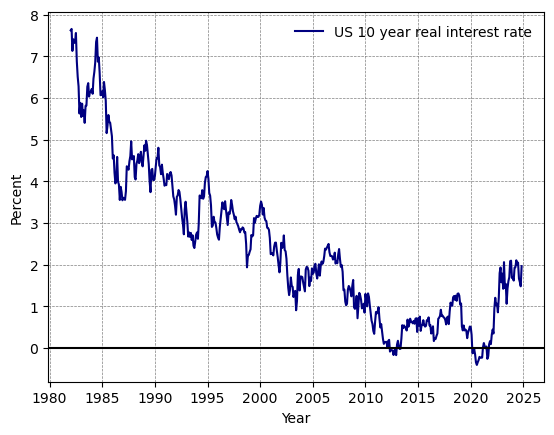

In [2]:
## US - Euro exchange rate
from fredapi import Fred #need to install this
fred = Fred(api_key='c0a963cd5bd17449f6d4b6a4e8d18f14')

us_1euro = fred.get_series('DEXUSEU') #gdp
plt.plot(us_1euro, color = 'navy', label = 'Exchange rate')
plt.legend(frameon = False)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('US dollar per 1 Euro')
plt.xlabel('Year')
plt.savefig('exrate.pdf')
plt.show()


i10y = fred.get_series('REAINTRATREARAT10Y') #gdp
plt.plot(i10y, color = 'navy', label = 'US 10 year real interest rate')
plt.legend(frameon = False)
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('Percent')
plt.xlabel('Year')
plt.savefig('i10y.pdf')
plt.axhline(0, color = 'black')
plt.show()

    geo\TIME_PERIOD     time    value         mm
0              EA20  2002-01   5836.2 2002-01-01
1              EA20  2002-02   5380.2 2002-02-01
2              EA20  2002-03   7179.7 2002-03-01
3              EA20  2002-04   3928.0 2002-04-01
4              EA20  2002-05   7014.9 2002-05-01
..              ...      ...      ...        ...
268            EA20  2024-05  11558.6 2024-05-01
269            EA20  2024-06  16128.9 2024-06-01
270            EA20  2024-07  12990.9 2024-07-01
271            EA20  2024-08  10793.3 2024-08-01
272            EA20  2024-09  13551.1 2024-09-01

[273 rows x 4 columns]


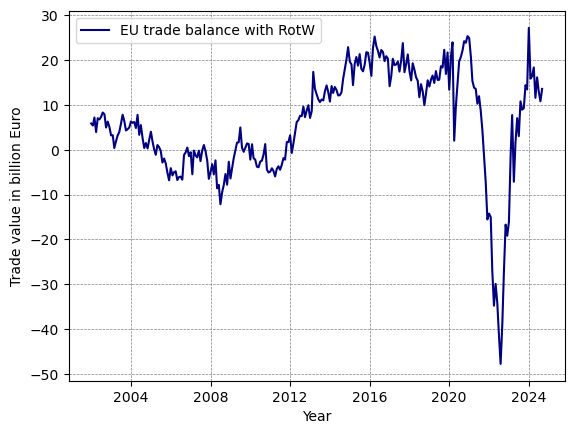

In [3]:
tb = eurostat.get_data_df('ext_st_easitc') #Monthly balance of trade, extra-euro area

tb = tb.loc[tb['stk_flow'] == 'BAL_RT'] #Only flows
tb = tb.loc[tb['sitc06'] == 'TOTAL'] #Total flows
tb = tb.loc[tb['partner'] == 'EXT_EA20'] #External flows
tb = tb.loc[tb['indic_et'] == 'TRD_VAL_SCA'] #Trade value in million Euro
tb = tb.drop(['freq','stk_flow','indic_et','partner','sitc06'],axis=1)  #drop the columns that are no longer needed

tb = pd.melt(tb, id_vars=['geo\TIME_PERIOD'], var_name='time', value_name='value') #Reshape the data into long format
tb['mm'] = pd.to_datetime(tb['time'])

print(tb)
plt.plot(tb.mm,tb.value/1000, label = 'EU trade balance with RotW',color = 'navy')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.ylabel('Trade value in billion Euro')
plt.xlabel('Year')
plt.legend()
plt.savefig('tb.pdf')
plt.show()